In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import xarray as xr

In [2]:
# define a function that opens the data file and returns the data
def open_data(data_dir):
    # open the data file
    era5 = xr.open_dataset(data_dir+'era5_data.nc')
    era5_single_lvl = xr.open_dataset(data_dir+'era5_single_levels.nc')
    goes_cod = xr.open_dataset(data_dir+'GOESDataUpdated/CloudOpticalDepth_remapped.nc')
    goes_ctt = xr.open_dataset(data_dir+'GOESDataUpdated/CloudTopTemperature_remapped.nc')
    goes_dsw = xr.open_dataset(data_dir+'GOESDataUpdated/DownwardSW_remapped.nc')
    goes_rsw = xr.open_dataset(data_dir+'GOESDataUpdated/ReflectedSW_remapped.nc')
    goes_tpw = xr.open_dataset(data_dir+'GOESDataUpdated/TotalPrecipWater_remapped.nc')
    # return the dataframes
    return era5, era5_single_lvl, goes_cod, goes_ctt, goes_dsw, goes_rsw, goes_tpw

In [3]:
# SET YOU OWN DATA DIRECTORY HERE
data_dir = '/Users/ionph/MLdata/'
# call the function to open the data
era5, era5_single_lvl, goes_cod, goes_ctt, goes_dsw, goes_rsw, goes_tpw = open_data(data_dir)

In [4]:
# define a function that plots the era5 data at a specific timestep at 950 hPa
def plot_data(era5, timestep):
    # Extract latitude and longitude values
    lats = era5.latitude.values
    lons = era5.longitude.values

    # Create subplots
    fig, ax = plt.subplots(4, 2, figsize=(15, 15))

    # Plot each variable using the corresponding Axes object
    im1 = ax[0, 0].imshow(era5['t'].sel(pressure_level=950, method='nearest').isel(valid_time=timestep), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])
    ax[0, 0].set_title('Temperature')
    ax[0, 0].set_xlabel('Longitude')
    ax[0, 0].set_ylabel('Latitude')
    ax[0, 0].invert_yaxis()
    ax[0, 0].set_xticks(lons[::10])
    ax[0, 0].set_yticks(lats[::10])
    fig.colorbar(im1, ax=ax[0, 0])

    im2 = ax[0, 1].imshow(era5['r'].sel(pressure_level=950, method='nearest').isel(valid_time=timestep), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])
    ax[0, 1].set_title('Relative Humidity')
    ax[0, 1].set_xlabel('Longitude')
    ax[0, 1].set_ylabel('Latitude')
    ax[0,1].invert_yaxis()
    ax[0, 1].set_xticks(lons[::10])
    ax[0, 1].set_yticks(lats[::10])
    fig.colorbar(im2, ax=ax[0, 1])

    im3 = ax[1, 0].imshow(era5['u'].sel(pressure_level=950, method='nearest').isel(valid_time=timestep), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])
    ax[1, 0].set_title('U Wind')
    ax[1, 0].set_xlabel('Longitude')
    ax[1, 0].set_ylabel('Latitude')
    ax[1, 0].invert_yaxis()
    ax[1, 0].set_xticks(lons[::10])
    ax[1, 0].set_yticks(lats[::10])
    fig.colorbar(im3, ax=ax[1, 0])

    im4 = ax[1, 1].imshow(era5['v'].sel(pressure_level=950, method='nearest').isel(valid_time=timestep), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])
    ax[1, 1].set_title('V Wind')
    ax[1, 1].set_xlabel('Longitude')
    ax[1, 1].set_ylabel('Latitude')
    ax[1, 1].invert_yaxis()
    ax[1, 1].set_xticks(lons[::10])
    ax[1, 1].set_yticks(lats[::10])
    fig.colorbar(im4, ax=ax[1, 1])

    im5 = ax[2, 0].imshow(era5['w'].sel(pressure_level=950, method='nearest').isel(valid_time=timestep), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])
    ax[2, 0].set_title('Vertical Wind')
    ax[2, 0].set_xlabel('Longitude')
    ax[2, 0].set_ylabel('Latitude')
    ax[2, 0].invert_yaxis()
    ax[2, 0].set_xticks(lons[::10])
    ax[2, 0].set_yticks(lats[::10])
    fig.colorbar(im5, ax=ax[2, 0])

    im6 = ax[2, 1].imshow(era5['clwc'].sel(pressure_level=950, method='nearest').isel(valid_time=timestep), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])
    ax[2, 1].set_title('Cloud Liquid Water Content')
    ax[2, 1].set_xlabel('Longitude')
    ax[2, 1].set_ylabel('Latitude')
    ax[2, 1].invert_yaxis()
    ax[2, 1].set_xticks(lons[::10])
    ax[2, 1].set_yticks(lats[::10])
    fig.colorbar(im6, ax=ax[2, 1])

    im7 = ax[3, 0].imshow(era5['cc'].sel(pressure_level=950, method='nearest').isel(valid_time=timestep), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])
    ax[3, 0].set_title('Cloud Cover')
    ax[3, 0].set_xlabel('Longitude')
    ax[3, 0].set_ylabel('Latitude')
    ax[3, 0].invert_yaxis()
    ax[3, 0].set_xticks(lons[::10])
    ax[3, 0].set_yticks(lats[::10])
    fig.colorbar(im7, ax=ax[3, 0])

    # Hide the last empty subplot
    ax[3, 1].axis('off')

    plt.tight_layout()
    plt.show()

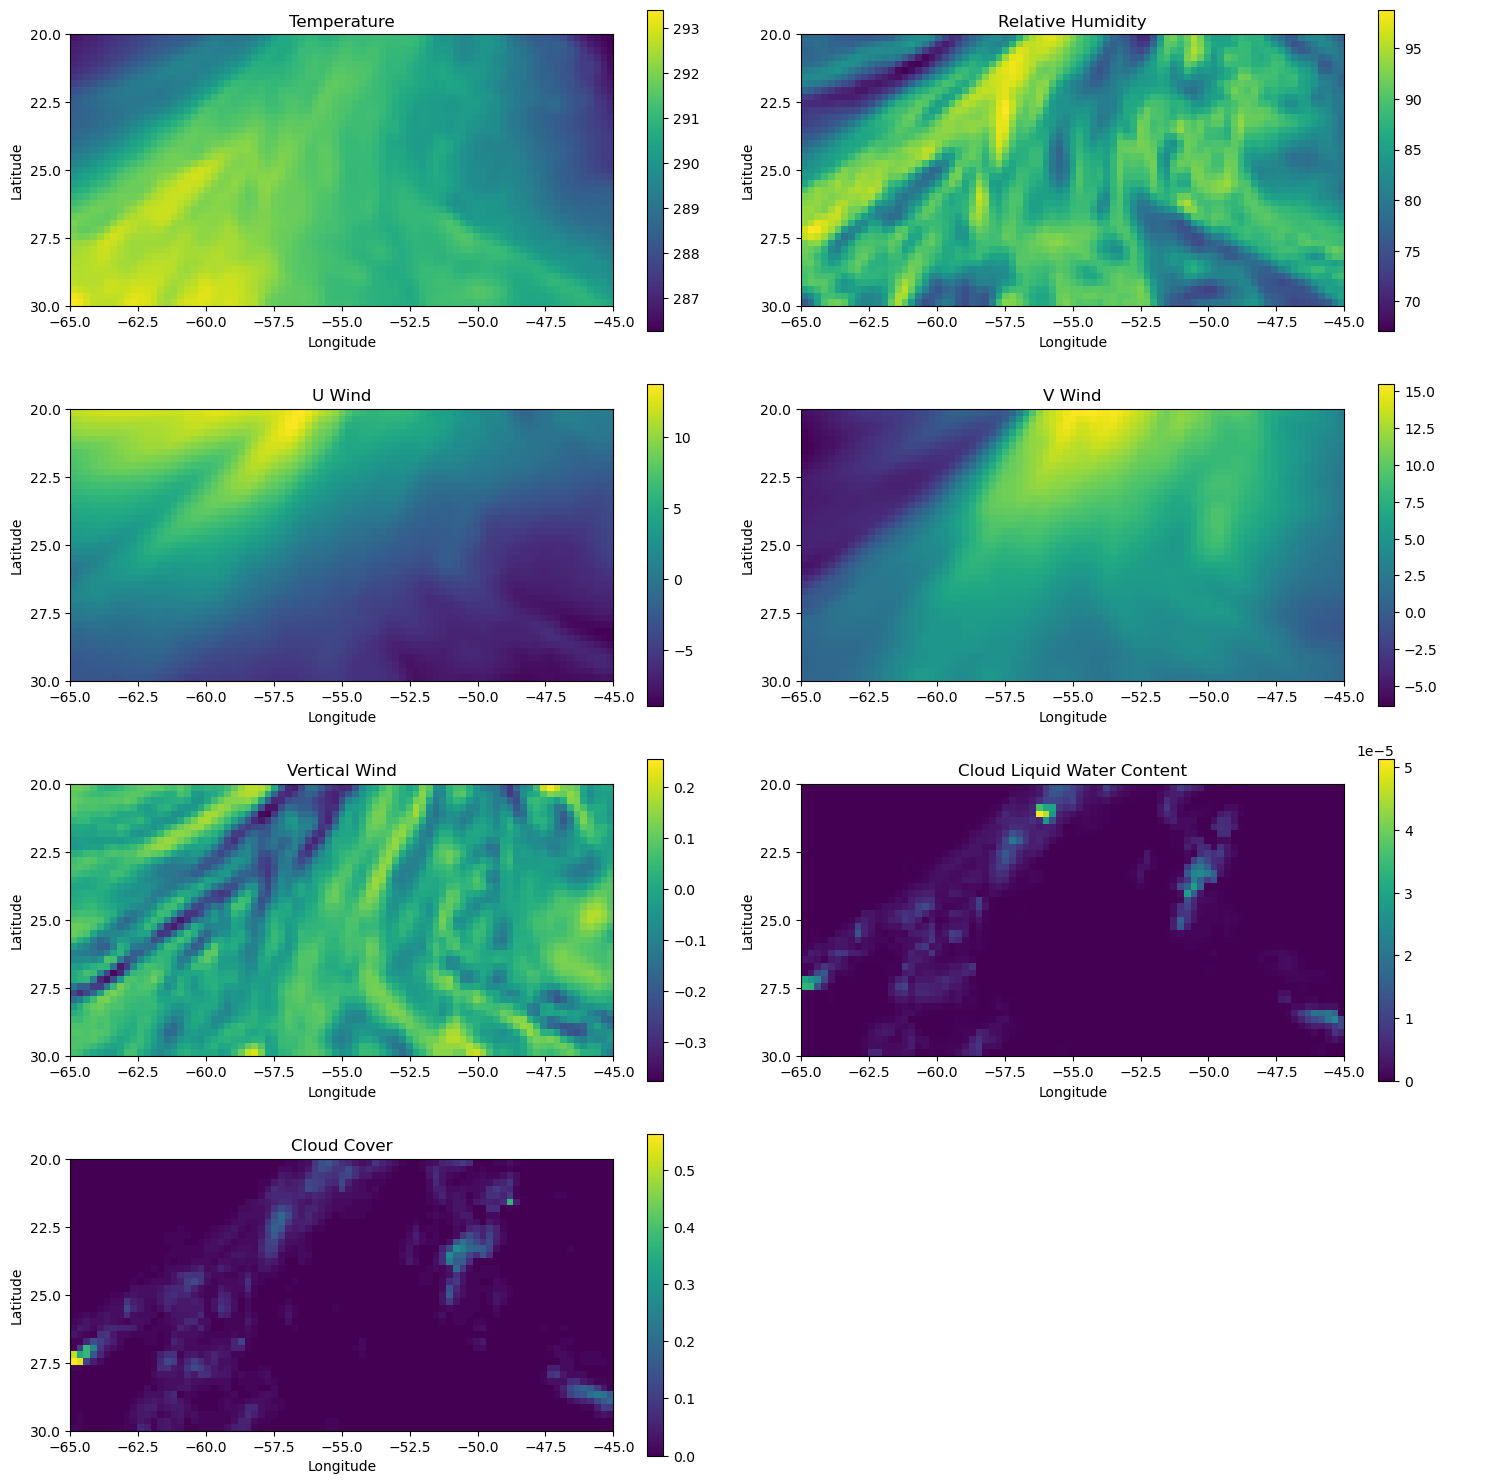

In [5]:
plot_data(era5, 0)

In [ ]:
import matplotlib.animation as animation

def animate_data(era5_single_lvl, variable):
    # Extract latitude and longitude values
    lats = era5_single_lvl.latitude.values
    lons = era5_single_lvl.longitude.values

    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 10))

    ims = []
    timesteps = len(era5_single_lvl.valid_time)
    for i in range(timesteps):
        im = ax.imshow(era5_single_lvl[variable].isel(valid_time=i), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()], animated=True)
        ax.set_title(era5_single_lvl.valid_time.values[i])
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_xticks(lons[::10])
        ax.set_yticks(lats[::10])
        if i == 0:
            ax.imshow(era5_single_lvl[variable].isel(valid_time=i), origin='lower', extent=[lons.min(), lons.max(), lats.min(), lats.max()])  # show an initial one first
        ims.append([im])

    interval = 35

    ani = animation.ArtistAnimation(fig, ims, interval=interval, blit=True, repeat_delay=interval*timesteps)
    ani.save(variable+"_movie.gif",writer='pillow')

In [ ]:
animate_data(era5_single_lvl, 'sst')